# Clustering using k-means

Author: Prof. Sandro Camargo <github.com/sandrocamargo>

Data Mining Course https://moodle.unipampa.edu.br/moodle/course/view.php?id=5213

This script uses the basic concepts of clustering.

In this script, we used the iris dataset https://archive.ics.uci.edu/dataset/53/iris

In [30]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

# import kmeans
from sklearn.cluster import KMeans

from sklearn import datasets

iris = datasets.load_iris()

data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])

data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


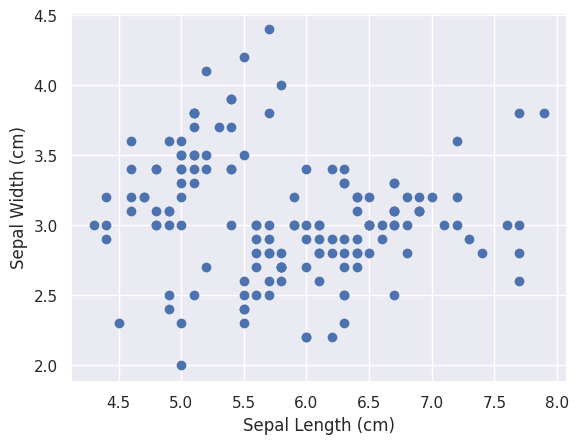

In [31]:
# ScatterPlot
# To display a two-dimensional graph, 2 out of the 4 available attributes were selected.
plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


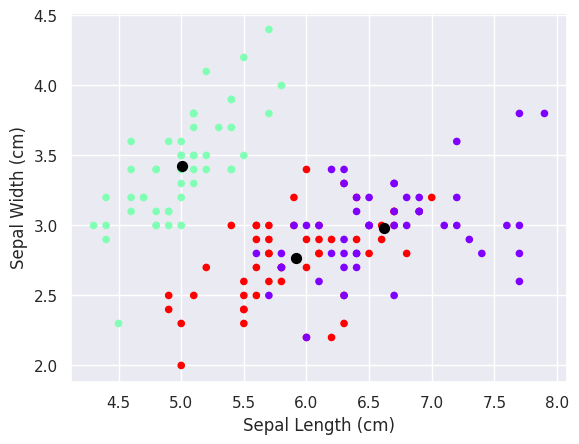

In [40]:
est = KMeans(3)  # 3 clusters
est.fit(data)
y_kmeans = est.predict(data)
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=y_kmeans, s=20, cmap='rainbow')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.scatter(est.cluster_centers_[:, 0], est.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')

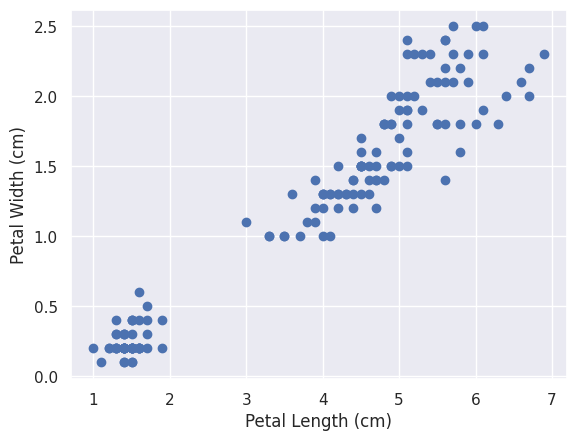

In [33]:
# ScatterPlot
# Selecting 2 different attributes
plt.scatter(data.iloc[:,2], data.iloc[:,3])
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

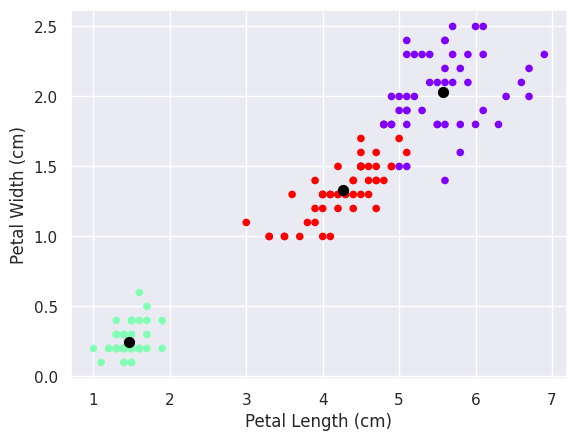

In [42]:
# Selecting 2 different attributes
plt.scatter(data.iloc[:, 2], data.iloc[:, 3], c=y_kmeans, s=20, cmap='rainbow')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.scatter(est.cluster_centers_[:, 2], est.cluster_centers_[:, 3], s = 50, c = 'black', label = 'Centroids')
plt.show()

# Elbow Method

The elbow method is a graphical method for finding the optimal K value in a k-means clustering algorithm. The elbow graph shows the within-cluster-sum-of-square (WCSS) values on the y-axis corresponding to the different values of K (on the x-axis). The optimal K value is the point at which the graph forms an elbow.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Elbow curve')

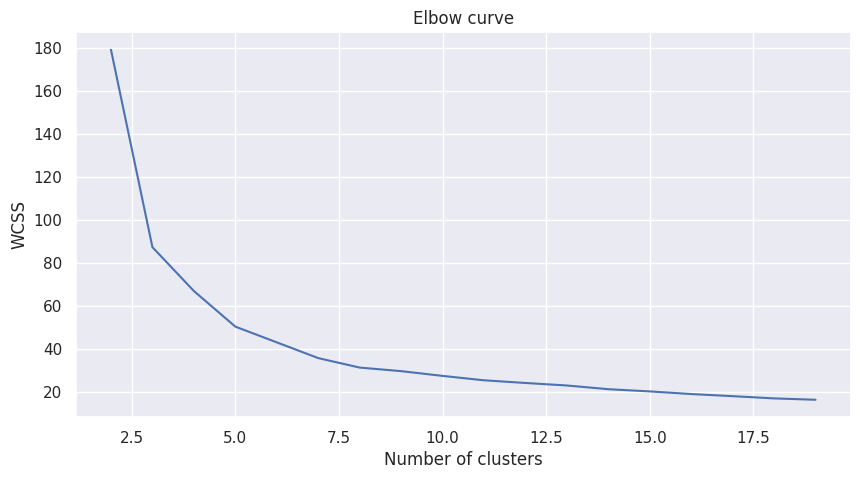

In [35]:
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, 20), distorsions)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.title('Elbow curve')